# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rajawali Putra
- **Email:** rajawali657@gmail.com
- **ID Dicoding:** rajawali_putra

## Menentukan Pertanyaan Bisnis

* Apakah pada musim Winter (angka 4 dalam kolom season) terdapat penurunan drastis penggunaan bike sharing?
* Pada musim apakah penggunaan bike sharing menunjukan angka paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import altair as alt

## Data Wrangling

### Gathering Data

In [18]:
df_day=pd.df_day=pd.read_csv("day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [20]:

df_normaltemp = df_day.copy()
# Create the new DataFrame
customer_df = df_normaltemp[['instant', 'cnt', 'season', 'temp']].rename(columns={'instant': 'id', 'cnt': 'total_user', 'temp' : 'temperature'})

# Display the new DataFrame
customer_df

,id,total_user,season,temperature
0,1,985,1,0.344167
1,2,801,1,0.363478
2,3,1349,1,0.196364
3,4,1562,1,0.200000
4,5,1600,1,0.226957
...,...,...,...,...
726,727,2114,1,0.254167
727,728,3095,1,0.253333
728,729,1341,1,0.253333
729,730,1796,1,0.255833


In [21]:
# Group the DataFrame by 'season' and calculate the total customers for each season
season_customer_totals = customer_df.groupby('season')['total_user'].sum()

# Display the result
season_customer_totals


,total_user
season,
1,471348
2,918589
3,1061129
4,841613


**Insight:**
- xxx
- xxx

### Assessing Data

Menilai tabel `df_day`

In [22]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- xxx
- xxx

### Cleaning Data

Selain mengubah format data di bawah dengan mengembalikan ke bentuk normal tidak ada lagi proses *Cleaning Data* yang dilakukan karena semua data sudah bersih dan siap dipakai.

Tujuan convert data dibawah berfungsi untuk mempermudah interpretasi data

In [23]:
#make a copy so the original dataset will not be overwritten
df_normaltemp = df_day.copy()


#mengubah value yang sudah dinormalisasi kembali ke format normal agar lebih mudah diinterpretasi
df_normaltemp['temp'] = df_day['temp'] * 41
df_normaltemp['atemp'] = df_day['atemp'] * 41
df_normaltemp['windspeed'] = df_day['windspeed'] * 67
df_normaltemp['hum'] = df_day['hum'] * 100

df_normaltemp.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,14.908625,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,14.503299,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,7.765605,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,8.697002,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,9.400070,43.6957,12.522300,82,1518,1600


In [24]:
df_normaltemp['dteday'] = pd.to_datetime(df_day['dteday'])
df_normaltemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [25]:
df_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
589,590,2012-08-12,3,1,8,0,0,0,1,0.700833,0.644579,0.530417,0.122512,2182,4362,6544
566,567,2012-07-20,3,1,7,0,5,1,2,0.665833,0.613025,0.844167,0.208967,747,5123,5870
605,606,2012-08-28,3,1,8,0,2,1,1,0.728333,0.666050,0.620000,0.190925,935,6105,7040
393,394,2012-01-29,1,1,1,0,0,0,1,0.282500,0.272721,0.311250,0.240050,558,2685,3243
185,186,2011-07-05,3,0,7,0,2,1,1,0.746667,0.696338,0.590417,0.126258,1031,3634,4665


**Insight:**
- Pada tabel ini ditemukan kolom **`instant`** yang bernilai Unique, dapat digunakan sebagai identifier
- Kolom **`dteday`** berisi keterangan tanggal
- Kolom **`season`** menunjukan keterangan musim, dengan format: season 1 = spring
2 = summer
3 = autumn
4 = winter
- Kolom **`holiday`** yang memberikan keterangan 1 = hari libur, 0 = hari kerja
- Kolom **`weathersit`** memberikan informasi tentang cuaca pada hari itu. weathersit : 1 = Cerah, 2 = Berawan 3 = Salju intensitas rendah, hujan ringan+petir, hujan ringan 4 = Hujan besar, bersalju lebat
- Kolom `casual` berisi informasi jumlah casual user
- Kolom `registered` berisi informasi jumlah user terdaftar
- Kolom `cnt` berisi total user casual + registered


## Visualization & Explanatory Analysis

### Pertanyaan 1:

* Apakah pada musim Winter (angka 4 dalam kolom season) terdapat penurunan drastis penggunaan bike sharing? dengan asumsi winter adalah musim terdingin

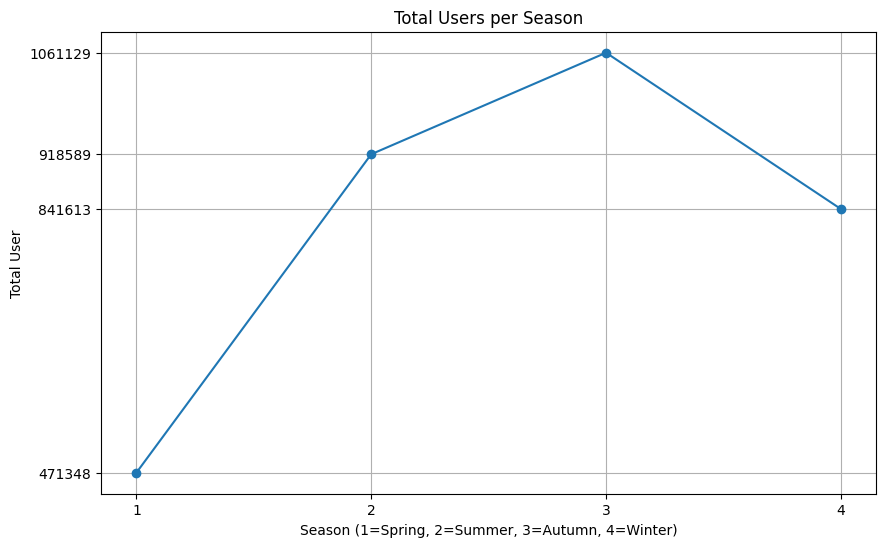

In [41]:
# prompt: make a line chart to show total user in each season, with X label is 1 = spring, 2 = summer, 3 = autumn, 4 = winter. label y = total user. input total_user column in label y

# Create the new DataFrame
customer_df = df_day[['instant', 'cnt', 'season']].rename(columns={'instant': 'id', 'cnt': 'total_user'})

# Group the DataFrame by 'season' and calculate the total customers for each season
season_customer_totals = customer_df.groupby('season')['total_user'].sum()

# Create the line chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(season_customer_totals.index, season_customer_totals.values, marker='o')
plt.xlabel('Season (1=Spring, 2=Summer, 3=Autumn, 4=Winter)')
plt.ylabel('Total User')
plt.title('Total Users per Season')
plt.xticks(season_customer_totals.index)  # Ensure all season numbers are displayed on the x-axis
plt.grid(True)

# Set y-axis labels to total_user values
plt.yticks(season_customer_totals.values, season_customer_totals.values)



plt.show()

**Insight**


*   Ditemukan bahwa winter bukanlah musim dengan pengguna bike sharing dengan jumlah terendah
*   Pada plot di atas dapat dilihat bahwa pada musim spring lah terdapat pengguna terendah dan pada musim autumn dengan pengguna terbanyak



### Pertanyaan 2:

*  Pada musim apakah penggunaan bike sharing menunjukan angka paling tinggi? Apakah ada korelasi antara suhu dingin dengan penggunaan bike sharing?

In [42]:
#making line chart with first line with total_user and another line with temperature

line_chart = alt.Chart(df_day).mark_line().encode(
    x=alt.X('season', axis=alt.Axis(values=[1, 2, 3, 4])),
    y='sum(cnt)',
    tooltip=['season', 'sum(cnt)']
)

line_chart2 = alt.Chart(df_day).mark_line(color='orange').encode(
    x='season',
    y='mean(temp)',
    tooltip=['season', 'mean(temp)']
).properties(
    title='Total User vs. Temperature',
    width=800,  # Set the width of the chart
    height=600   # Set the height of the chart
)

# Combine the charts using layer
final_chart = alt.layer(line_chart, line_chart2).resolve_scale(y='independent')

# Display the combined chart
final_chart

alt.LayerChart(...)

**Insight**


*   Ditemukan korelasi antara jumlah pengguna bike sharing dengan temperature pada saat itu.
*   Pada musim autumn yang ditandai dengan season = 3 menunjukan suhu paling tinggi dan jumlah pengguna bike sharing paling banyak



## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2